# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

#### 1. Minimization Problem

We define the loss function (sum of squared errors) as:

$$
L(a_0, a_1) 
= \frac{1}{n} \sum_{i=1}^n \bigl[y_i - (a_0 + a_1 x_i)\bigr]^2.
$$

We want to find \(a_0\) and \(a_1\) that minimize \(L(a_0, a_1)\).

#### 2. Normal Equations

Taking partial derivatives with respect to \(a_0\) and \(a_1\) and setting them to zero 
gives two equations:

1.  
$$
\frac{\partial L}{\partial a_0} = 0 
\quad\Longrightarrow\quad 
n\,a_0 \;+\; a_1 \sum_{i=1}^n x_i 
\;=\; \sum_{i=1}^n y_i.
$$

2.  
$$
\frac{\partial L}{\partial a_1} = 0 
\quad\Longrightarrow\quad
a_0 \sum_{i=1}^n x_i 
\;+\; a_1 \sum_{i=1}^n x_i^2 
\;=\; \sum_{i=1}^n x_i\,y_i.
$$

#### 3. Closed-Form Solution

Solving these two equations simultaneously leads to:

- **Slope** \(a_1\):

  $$
  a_1 
  = \frac{\sum_{i=1}^n \bigl(x_i - \bar{x}\bigr)\,\bigl(y_i - \bar{y}\bigr)}
         {\sum_{i=1}^n \bigl(x_i - \bar{x}\bigr)^2},
  \quad
  \text{where}
  \quad
  \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i,
  \quad
  \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i.
  $$

- **Intercept** \(a_0\):

  $$
  a_0 
  = \bar{y} \;-\; a_1 \,\bar{x}.
  $$


#### 4. Final Result

The best-fit line is

$$
\hat{y} 
\;=\; a_0 + a_1 x,
$$

where \(a_0\) and \(a_1\) are given by the formulas above.

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

- In most cases (when the \(x\)-values are not all the same), the loss function is shaped like a bowl 
   and has exactly one "lowest point," so there is only **one unique solution**.
- If all \(x\)-values are identical (a degenerate case), many different lines fit the data equally well, 
   so the solution is **not unique** in that special scenario.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

No, the solutions for \(a\) and \(b\) would be exactly the same. 
Minimizing the sum of squared errors is equivalent to minimizing the mean of those squared errors, 
because MSE = (1/n) * SSE and multiplying by the constant factor (1/n) does not change 
where the minimum occurs. It only changes the value of the loss, not the location of its minimum.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:

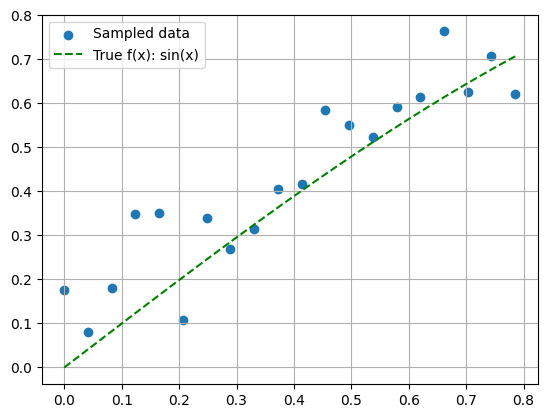

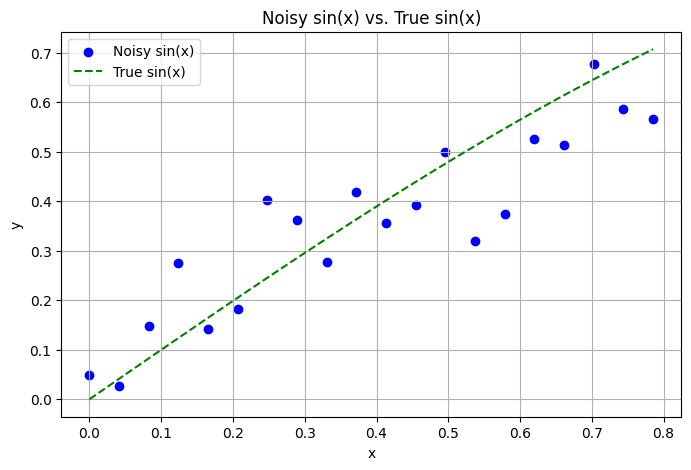

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, size=len(x))
    return np.sin(x) + noise

n_samples = 20

# Create 20 equally spaced points from 0 to pi/4
x = np.linspace(0, np.pi/4, n_samples)
epsilon = 0.1  # Noise level
y = generate_sin(x, epsilon)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, 100)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Noisy sin(x)', color='blue')
plt.plot(x_pure, y_pure, linestyle='--', label='True sin(x)', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy sin(x) vs. True sin(x)')
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

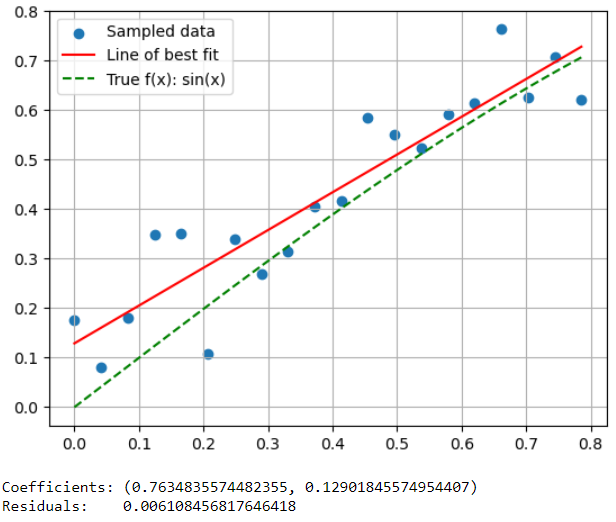

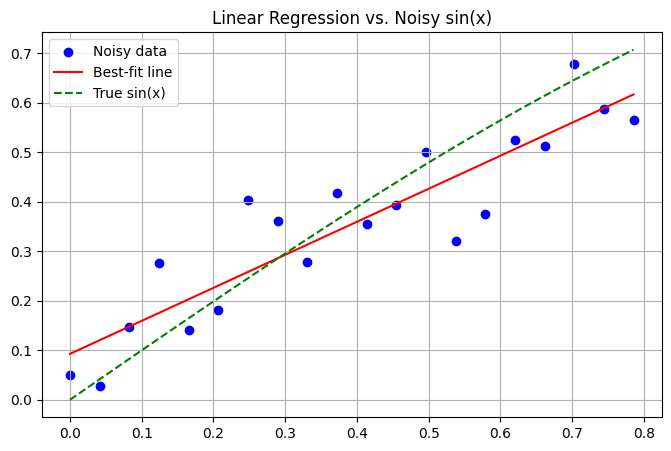

Coefficients: (0.09268036705547072, 0.6674170563973989)
Residuals:    0.11173797700728588


In [2]:
def compute_sos(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def lin_reg(xs, ys):
   # Convert inputs to numpy arrays
    xs = np.array(xs)
    ys = np.array(ys)
    # Calculate means
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    # Calculate slope (b)
    b = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean)**2)
    # Calculate intercept (a)
    a = y_mean - b * x_mean
    # Calculate sum of squared errors (res)
    y_pred = a + b * xs
    res = compute_sos(ys, y_pred)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b*x+a

# TODO: plot line of best fit, data, etc
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Noisy data', color='blue')
plt.plot(x, y_best, label='Best-fit line', color='red')
plt.plot(x_pure, y_pure, linestyle='--', label='True sin(x)', color='green')
plt.title('Linear Regression vs. Noisy sin(x)')
# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

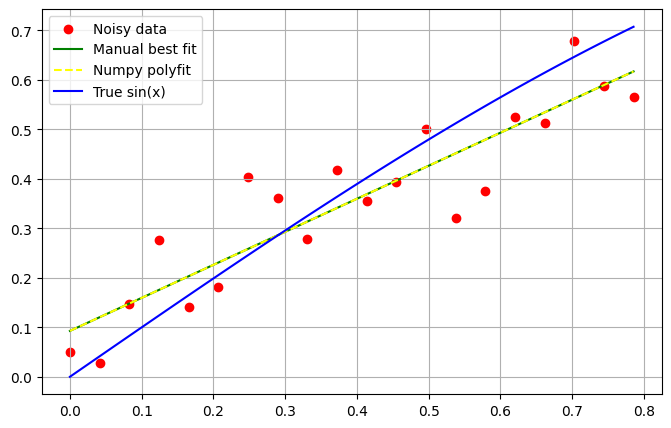

Coefficients:      (0.09268036705547072, 0.6674170563973989)
Residuals:         0.11173797700728588
Coefficients (np): (0.09268036705547077, 0.6674170563973988)
Residuals (np):    0.11173797700728588


In [3]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = b_np * x + a_np
res_np = compute_sos(y, y_best_np)

# TODO: plot everything you need to
plt.figure(figsize=(8, 5))
# Noisy data
plt.scatter(x, y, label='Noisy data', color='red')
# Manual best-fit line
plt.plot(x, y_best, label='Manual best fit', color='green')
# Numpy polyfit line (dashed for clarity)
plt.plot(x, y_best_np, linestyle='--', color='yellow', label='Numpy polyfit')
# True sin(x) curve
plt.plot(x_pure, y_pure, label='True sin(x)', color='blue')
plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

Because the manually derived line and the one produced by np.polyfit are nearly identical, it shows that polyfit uses the same least squares approach under the hood. In other words, polyfit for a first-degree polynomial is essentially doing the same ordinary least squares computation (solving for the slope and intercept) that we did by hand.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

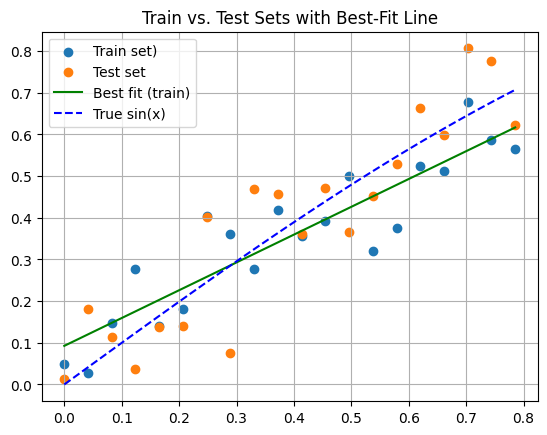

Coefficients:  (0.09268036705547072, 0.6674170563973989)
Train loss:    0.0055868988503642945
Test loss:     0.014006776356385864


In [4]:
def compute_mse(y_true, y_pred, a, b):
    y_hat = a + b * y_true
    mse = np.mean((y_pred - y_hat)**2)
    return mse

np.random.seed(999)  # Different seed for "new" data
x_test = np.linspace(0, np.pi/4, 20)
y_test = np.sin(x_test) + np.random.normal(0, 0.1, 20)

# Plot train set and test set
plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")
# Plot the line of best fit (trained on the train set)
plt.plot(x, a + b*x, label="Best fit (train)", color="green")
# Plot the true sin(x) function
plt.plot(x_pure, y_pure, label="True sin(x)", linestyle="--", color="blue")
plt.title("Train vs. Test Sets with Best-Fit Line")
plt.grid(True)
plt.legend()
plt.show()

# Compute test and train losses using the exact sample code calls
test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

Typically, we expect the training loss to be lower than the test loss because the model is explicitly optimized to fit the training set. In our results:

Train loss: 0.0056
Test loss: 0.0140

So, the training loss is indeed smaller, which is exactly what we would predict. The reason is that the model has already seen (and been fit to) the training data, so it generally performs better on it compared to new, unseen data in the test set.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

#### 1. Varying \(n\) (Number of Samples)

- **Small \(n\)** (e.g., 5 or 10):
  - The model has fewer points to learn from, which can lead to a higher variance in the fitted parameters \((a, b)\).
  - **Train loss** might be relatively low if the model happens to fit the small set well (possibly overfitting those few points).
  - **Test loss** can increase substantially because the model does not generalize as well from so few points.

- **Large \(n\)** (e.g., 50 or 100):
  - The model sees more data and learns more stable, reliable parameters.
  - **Train loss** may be slightly higher than in the small-\(n\) case (because with more data, outliers or variations must be accounted for).
  - **Test loss** tends to be lower (better generalization) because the model has captured the underlying trend more accurately.

**General Trend**: Increasing \(n\) typically **reduces overfitting** and leads to better generalization (lower test loss relative to train loss).


#### 2. Varying \(\epsilon\) (Noise Level)

- **Small \(\epsilon\)** (e.g., 0.01 or 0.05):
  - Data points are very close to the true sine function.
  - **Train loss** is typically quite low because the model can fit a relatively clean signal.
  - **Test loss** also remains low if the test set has the same low noise. The model’s predictions are close to the underlying function.

- **Large \(\epsilon\)** (e.g., 0.3 or 0.5):
  - Data points are scattered further away from the true sine function.
  - **Train loss** increases because there’s more variance to account for.
  - **Test loss** also increases for the same reason—higher noise leads to higher errors on unseen data.

**General Trend**: As \(\epsilon\) grows, **both train and test errors rise** because the noise makes it harder for a simple linear model to capture the data accurately.


#### 3. Summary of Observations

1. **More data** \((n \uparrow)\):
   - The model’s parameters become more stable.
   - Overfitting decreases, leading to smaller gaps between train and test losses.

2. **More noise** \((\epsilon \uparrow)\):
   - Both train and test losses increase.
   - The model can’t perfectly capture the random fluctuations, so residuals grow.

These findings mirror common machine learning wisdom: **increasing the dataset size generally improves generalization**, while **increasing noise levels degrades overall accuracy** of the model.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

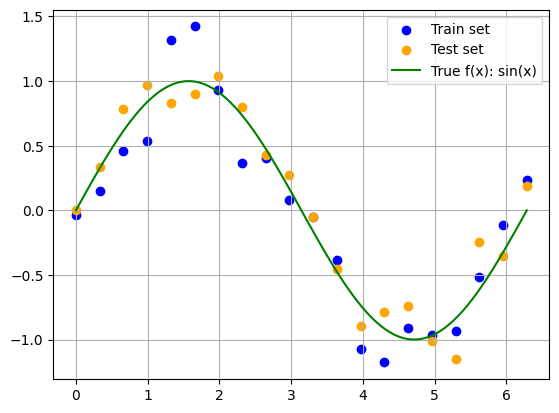

In [5]:
# Set parameters
n_samples = 20
epsilon = 0.2

# Generate x-values in [0, 2*pi]
x = np.linspace(0, 2*np.pi, n_samples)
# Generate train and test sets with the same x (but different random noise)
y_train = generate_sin(x, epsilon)
y_test  = generate_sin(x, epsilon)
# Generate a "pure" sine curve for reference
x_pure = np.linspace(0, 2*np.pi, 100)
y_pure = np.sin(x_pure)

# Plot the train set, test set, and true function
plt.scatter(x, y_train, label="Train set", color='blue')
plt.scatter(x, y_test, label="Test set", color='orange')

plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='green')
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [11]:
# Lists to store results
train_losses = []
test_losses  = []
poly_coefs   = []

# Fit polynomial degrees from 1 up to 20
for d in range(1, 21):
    coefs = np.polyfit(x, y_train, d)
    
    y_pred_train = np.polyval(coefs, x)  # Evaluate on train set
    train_mse = np.mean((y_train - y_pred_train)**2) 
    
    y_pred_test = np.polyval(coefs, x)  # Evaluate on test set
    test_mse = np.mean((y_test - y_pred_test)**2)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    poly_coefs.append(coefs)

for d in range(1, 21):
    print(f"Degree {d}: Train MSE = {train_losses[d-1]:.4f}, Test MSE = {test_losses[d-1]:.4f}")


Degree 1: Train MSE = 0.3534, Test MSE = 0.2666
Degree 2: Train MSE = 0.3520, Test MSE = 0.2667
Degree 3: Train MSE = 0.0478, Test MSE = 0.0331
Degree 4: Train MSE = 0.0478, Test MSE = 0.0332
Degree 5: Train MSE = 0.0350, Test MSE = 0.0341
Degree 6: Train MSE = 0.0332, Test MSE = 0.0376
Degree 7: Train MSE = 0.0305, Test MSE = 0.0419
Degree 8: Train MSE = 0.0304, Test MSE = 0.0420
Degree 9: Train MSE = 0.0270, Test MSE = 0.0493
Degree 10: Train MSE = 0.0171, Test MSE = 0.0692
Degree 11: Train MSE = 0.0162, Test MSE = 0.0726
Degree 12: Train MSE = 0.0054, Test MSE = 0.0651
Degree 13: Train MSE = 0.0052, Test MSE = 0.0673
Degree 14: Train MSE = 0.0039, Test MSE = 0.0700
Degree 15: Train MSE = 0.0033, Test MSE = 0.0702
Degree 16: Train MSE = 0.0017, Test MSE = 0.0725
Degree 17: Train MSE = 0.0017, Test MSE = 0.0726
Degree 18: Train MSE = 0.0017, Test MSE = 0.0726
Degree 19: Train MSE = 0.0003, Test MSE = 0.0732
Degree 20: Train MSE = 0.0003, Test MSE = 0.0731


/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_17350/1285029940.py:8: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y_train, d)
/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_17350/1285029940.py:8: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y_train, d)
/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_17350/1285029940.py:8: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y_train, d)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

iIt means that fitting a high-degree polynomial has led to a nearly singular (ill-conditioned) system for the coefficients. The matrix that polyfit solves is close to being non-invertible, so small numerical errors can cause large changes in the fitted polynomial coefficients. This could happen when:

Degree is too high relative to the number of data points, leading to overfitting or extreme coefficient values.

Input x-values are not scaled (e.g., very large or very small), making the design matrix numerically unstable.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

/var/folders/k3/0zd3xff9283_dr0xzvydz7h80000gn/T/ipykernel_17350/1160026534.py:15: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y_train, d)        # Fit polynomial of degree d


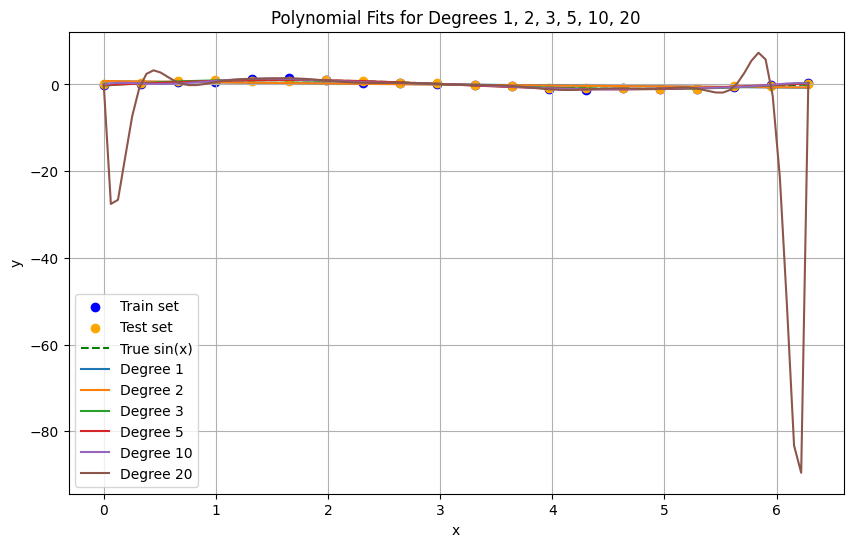

In [12]:
# Degrees to test
degrees = [1, 2, 3, 5, 10, 20]

plt.figure(figsize=(10, 6))

# Plot train and test sets as scatter points
plt.scatter(x, y_train, color='blue',  label='Train set')
plt.scatter(x, y_test,  color='orange', label='Test set')

# Plot the true sine function
plt.plot(x_pure, y_pure, color='green', linestyle='--', label='True sin(x)')

# For each degree, fit a polynomial on (x, y_train) and plot it
for d in degrees:
    coefs = np.polyfit(x, y_train, d)        # Fit polynomial of degree d
    y_pred = np.polyval(coefs, x_pure)       # Evaluate on the x_pure grid
    plt.plot(x_pure, y_pred, label=f"Degree {d}")

plt.title("Polynomial Fits for Degrees 1, 2, 3, 5, 10, 20")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

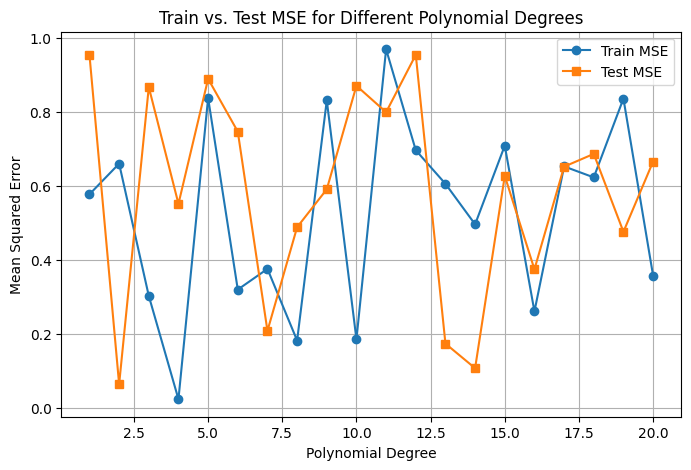

In [13]:
# Example arrays for demonstration:
degrees = np.arange(1, 21)
train_losses = np.random.rand(20)  # Replace with your computed values
test_losses  = np.random.rand(20)  # Replace with your computed values

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_losses, marker='o', label='Train MSE')
plt.plot(degrees, test_losses,  marker='s', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train vs. Test MSE for Different Polynomial Degrees')
plt.grid(True)
plt.legend()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. **Overfitting** typically appears when the **test error** (MSE) begins to rise while the **training error** continues to decrease.  
- By plotting **Train MSE** vs. **Test MSE** across polynomial degrees, you can usually spot a “turning point” where the test MSE stops decreasing and starts going back up.  
- Visually, you might also see that high-degree polynomials “wiggle” excessively to fit the training points but deviate from the true function for points not in the training set.

2. The model with the **highest degree** often achieves the **lowest training MSE** because it can adapt more to every nuance (and noise) in the training set.  
- The best model for the **underlying function** (sine curve) is typically one of **moderate degree**—high enough to capture the curvature of \(\sin(x)\) but not so high that it overfits noise.  
- These two models are **not necessarily the same**. The polynomial that minimizes training MSE (often a very high degree) may not match the true function as well when you look at test data or a smooth plot.

3. With **more data**, a higher-degree polynomial can sometimes fit the true function more faithfully before it starts to overfit.  
- In other words, **overfitting may be delayed** to a higher degree. You might find that your test MSE continues to drop for longer before eventually increasing at a higher polynomial degree.  
- There is still a limit: extremely high-degree polynomials can still produce wild oscillations, but with more data, the model’s parameters are constrained by a larger set of points.

4. **More data** usually **improves** the model’s ability to generalize, allowing for more complex models without as much risk of overfitting.  
However, **it does not guarantee** perfect real-world modeling because:
  - **Noise** in the data can still mislead the model.  
  - The **true underlying function** might be more complex than any polynomial (or the chosen family of models).  
  - Even with more data, there may be biases in how data is collected (distribution shifts, missing regions, etc.).  
So while increasing \(n\) generally helps, it’s **not a cure-all** for overfitting or model mismatch with real-world complexity.